In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml

In [96]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [97]:
X,y=mnist['data'],mnist['target']

In [98]:
X.shape

(70000, 784)

In [99]:
X.max(), X.min()

(np.int64(255), np.int64(0))

In [100]:
y.shape

(70000,)

In [101]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [102]:
# normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

In [103]:
type(X_train)

numpy.ndarray

In [104]:
# y_train = y_train.astype(np.uint8)
# y_test = y_test.astype(np.uint8)

In [105]:
some_digit=X[6]

In [106]:
some_digit_img=some_digit.reshape(28,28)

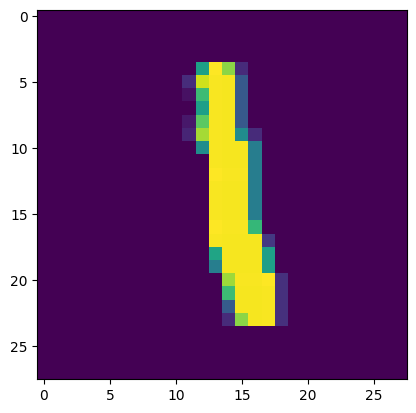

In [107]:
plt.imshow(some_digit_img)

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [109]:
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

# **SGD Model Applying**

In [110]:
sgd = SGDClassifier(loss="hinge", max_iter=10, random_state=42)

In [111]:
model_sgd=sgd.fit(X_train,y_train)

In [112]:
acc_sgd = accuracy_score(y_test, model_sgd.predict(X_test))


In [113]:
acc_sgd

0.9009

In [114]:
y_pred_sgd=model_sgd.predict(X_test)

In [115]:
y_pred_sgd

array(['7', '2', '1', ..., '4', '5', '6'], dtype='<U1')

In [116]:
print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

SGD Accuracy: 0.9009
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.88      0.90      1032
           3       0.95      0.82      0.88      1010
           4       0.94      0.90      0.92       982
           5       0.72      0.92      0.81       892
           6       0.91      0.95      0.93       958
           7       0.90      0.94      0.92      1028
           8       0.87      0.78      0.82       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# **Random Forest Model Applying**

In [117]:
rf=RandomForestClassifier()

In [118]:
model_rf=rf.fit(X_train,y_train)

In [119]:
y_pred_rf=model_rf.predict(X_test)

In [120]:
acc_rf=accuracy_score(y_test,y_pred_rf)

In [121]:
acc_rf

0.9693

In [122]:
print("Random Forest Accuracy:",acc_rf)
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.9693
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



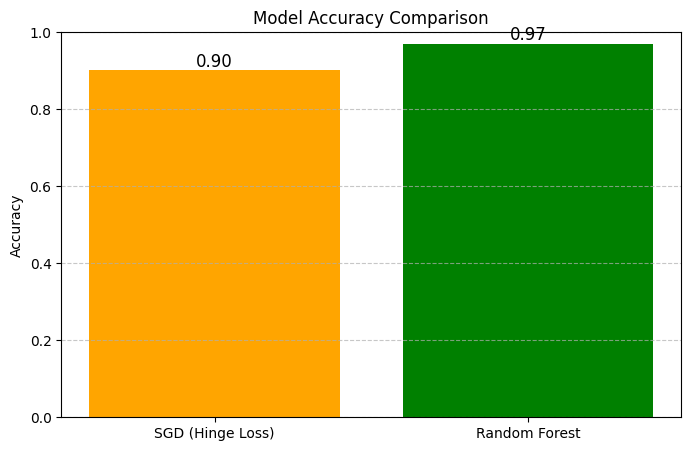

In [123]:
# Step 5: Plot Accuracy Comparison
models = [ 'SGD (Hinge Loss)', 'Random Forest']
accuracies = [ acc_sgd, acc_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=[ 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy between 0 and 1
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


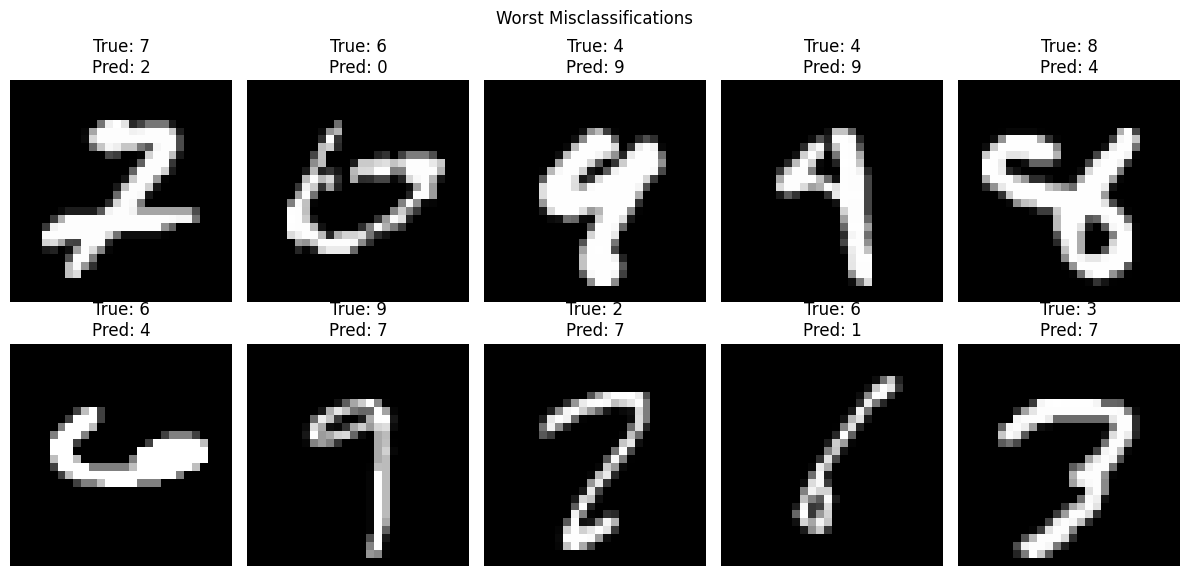

In [124]:
import matplotlib.pyplot as plt

# Select model to visualize: SGD or RF
model = rf  # or sgd
X_used = X_test if model == rf else X_test
y_pred = model.predict(X_used)
y_prob = model.predict_proba(X_used)

wrong_mask = y_pred != y_test
wrong_imgs = X_test[wrong_mask]    # Assuming X_test are image-like
wrong_true = y_test[wrong_mask]
wrong_pred = y_pred[wrong_mask]
wrong_conf = np.max(y_prob[wrong_mask], axis=1)

# Top 10 most confident wrong predictions
worst_idx = np.argsort(wrong_conf)[-10:]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(worst_idx):
    plt.subplot(2, 5, i + 1)
    plt.imshow(wrong_imgs[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {wrong_true[idx]}\nPred: {wrong_pred[idx]}")
    plt.axis('off')

plt.suptitle("Worst Misclassifications")
plt.tight_layout()
plt.show()



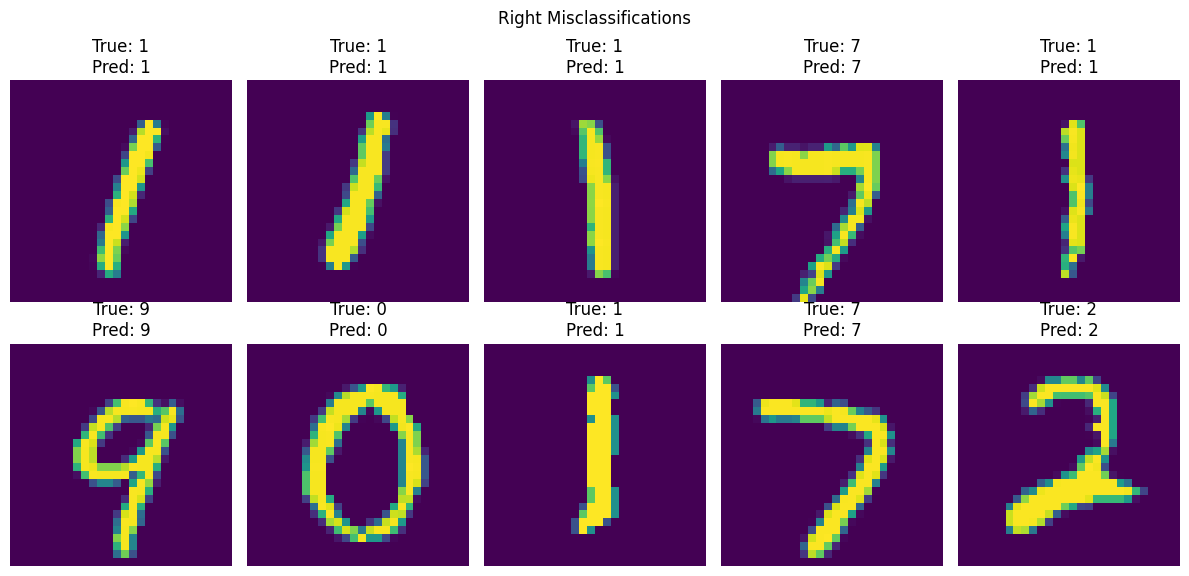

In [125]:
import matplotlib.pyplot as plt

# Select model to visualize: SGD or RF
model = rf  # or sgd
X_used = X_test if model == rf else X_test
y_pred = model.predict(X_used)
y_prob = model.predict_proba(X_used)

wrong_mask = y_pred == y_test
wrong_imgs = X_test[wrong_mask]    # Assuming X_test are image-like
wrong_true = y_test[wrong_mask]
wrong_pred = y_pred[wrong_mask]
wrong_conf = np.max(y_prob[wrong_mask], axis=1)

# Top 10 most confident wrong predictions
worst_idx = np.argsort(wrong_conf)[-10:]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(worst_idx):
    plt.subplot(2, 5, i + 1)
    plt.imshow(wrong_imgs[idx].reshape(28, 28))
    plt.title(f"True: {wrong_true[idx]}\nPred: {wrong_pred[idx]}")
    plt.axis('off')

plt.suptitle("Right Misclassifications")
plt.tight_layout()
plt.show()

In [54]:
model_rf.predict([X_test[0]])

array(['7'], dtype=object)

In [55]:
y_test[0]

'7'

In [148]:
import random

def test_random_predictions(n=5, model_choice="SGD"):
    print(f"\nTesting {n} random images using model: {model_choice}\n")
    for i in range(n):
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx]
        label = y_test[idx]

        # Predict
        # img_input = img.reshape(1, -1) / 255.0
        # img_scaled = scaler.transform([img])

        if model_choice == "SGD":
            pred = model_sgd.predict([img])[0]
        else:
            pred = model_rf.predict([img])[0]

        result = "✅ Correct" if pred == label else "❌ Wrong"
        print(f"[{i+1}] Predicted: {pred}, Actual: {label} → {result}")


In [151]:
test_random_predictions(n=15, model_choice="SGD")
test_random_predictions(n=15, model_choice="Random Forest")



Testing 15 random images using model: SGD

[1] Predicted: 2, Actual: 2 → ✅ Correct
[2] Predicted: 9, Actual: 9 → ✅ Correct
[3] Predicted: 5, Actual: 5 → ✅ Correct
[4] Predicted: 1, Actual: 1 → ✅ Correct
[5] Predicted: 0, Actual: 8 → ❌ Wrong
[6] Predicted: 4, Actual: 4 → ✅ Correct
[7] Predicted: 6, Actual: 6 → ✅ Correct
[8] Predicted: 4, Actual: 4 → ✅ Correct
[9] Predicted: 4, Actual: 9 → ❌ Wrong
[10] Predicted: 3, Actual: 3 → ✅ Correct
[11] Predicted: 9, Actual: 9 → ✅ Correct
[12] Predicted: 3, Actual: 3 → ✅ Correct
[13] Predicted: 4, Actual: 4 → ✅ Correct
[14] Predicted: 5, Actual: 5 → ✅ Correct
[15] Predicted: 9, Actual: 4 → ❌ Wrong

Testing 15 random images using model: Random Forest

[1] Predicted: 4, Actual: 4 → ✅ Correct
[2] Predicted: 7, Actual: 7 → ✅ Correct
[3] Predicted: 9, Actual: 9 → ✅ Correct
[4] Predicted: 6, Actual: 6 → ✅ Correct
[5] Predicted: 8, Actual: 8 → ✅ Correct
[6] Predicted: 4, Actual: 4 → ✅ Correct
[7] Predicted: 7, Actual: 7 → ✅ Correct
[8] Predicted: 0, Actu

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure output folder exists
os.makedirs("mnist_digits", exist_ok=True)

# Save first 5 digit images from X
for i in range(5):
    img_array = X[i].reshape(28, 28)  # reshape 1D to 2D
    plt.imsave(f"mnist_digits/digit_{i}.png", img_array, cmap='gray')


In [147]:
import gradio as gr
import numpy as np

def predict_digit(img, model_choice):
    if img is None:
        return "No image received."

    try:
        # Step 1: Convert RGB to Grayscale if needed
        if img.ndim == 3 and img.shape[2] == 3:
            img = img.mean(axis=2)  # RGB → Grayscale

        # Step 2: Flatten and normalize
        img = img.reshape(1, -1) / 255.0

        # Step 3: Predict
        if model_choice == "SGD":
            pred = model_sgd.predict(img)[0]
        else:
            pred = model_rf.predict(img)[0]

        return f"Predicted Digit: {pred}"

    except Exception as e:
        return f"Error: {str(e)}"


# Gradio Interface
iface = gr.Interface(
    fn=predict_digit,
    inputs=[
        gr.Image(type="numpy", label="Upload 28x28 Grayscale Digit"),
        gr.Dropdown(["SGD", "Random Forest"], label="Choose Model")
    ],
    outputs="text",
    title="MNIST Digit Recognizer (0–9)",
    description="Upload a 28x28 grayscale digit image. Choose model to predict."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9fde8e3d203452ad31.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
